In [1]:
#Differentiable Programming Part 1 -  Mainz Institute for Theoretical Physics - https://www.youtube.com/watch?v=9OvU9T2-pNs&list=WL&index=62

In [2]:
!pip install torch
!pip install matplotlib
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 3.2 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:0000:0100:02
  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 9.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 KB 14.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def generate_data(N):
    X = torch.randint(0,9, size = (N, 10))
    num2s = torch.count_nonzero(X == 2, dim = -1)
    num4s = torch.count_nonzero(X == 4, dim = -1)

    labels = (num4s > num2s)

    return X, labels.reshape(-1, 1).float()

# X, y = generate_data(123)

In [4]:
class AttentionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.query = torch.nn.Parameter(torch.randn(1,16))
        self.embed_func = torch.nn.Embedding(10, embedding_dim=16)
        self.key_func = torch.nn.Linear(16,16)

        self.value_func = torch.nn.Sequential(
            torch.nn.Linear(16,32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,1)
        )

        self.head_mlp = torch.nn.Sequential(
            torch.nn.Linear(1,32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,1),
            torch.nn.Sigmoid()
        )

    def forward(self, X):
            embedX = self.embed_func(X)
            keys = self.key_func(embedX)
            qk=torch.einsum('ie, bje -> bij', self.query, keys)
            qk = qk / 16**0.5
            att = torch.nn.functional.softmax(qk, dim = -1)

            vals = self.value_func(embedX)
            summary = torch.einsum('bij, bje->bie', att, vals)[:,0,:]
            pred = self.head_mlp(summary)

            return pred, att, vals

In [5]:
def train():
    model = AttentionModel()
    opt = torch.optim.Adam(model.parameters(), lr = 3e-4)
    losses = []
    for idx in range(5_000):
        X, y = generate_data(123)
        p, a, v = model(X)
        loss = torch.nn.functional.binary_cross_entropy(p, y)
        losses.append(float(loss))
        if idx % 100 == 0:
            print(float(loss))
            plt.plot(losses)
            plt.gcf().set_size_inches(2,2)
            plt.show()
        loss.backward()
        opt.step()
        opt.zero_grad()

    return model

#plt.hist(p.detach().ravel())

0.7670614123344421


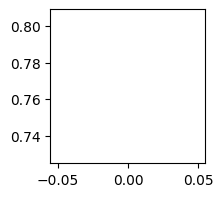

In [6]:
model = train()

In [7]:
with torch.no_grad():
    X = torch.LongTensor([(1,2,1,1,2,2,1,6,7,5)])
    p,a,v = model(X)

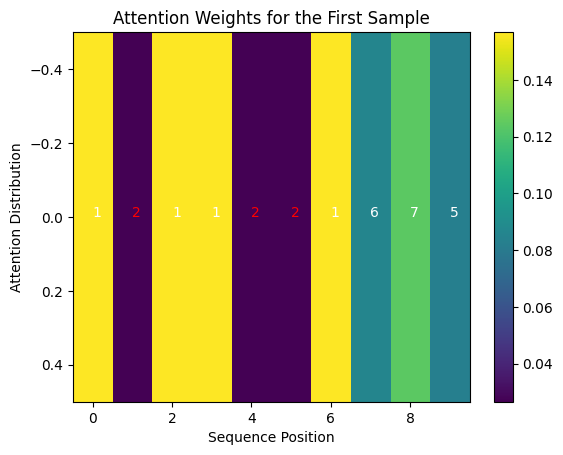

AttributeError: module 'matplotlib.pyplot' has no attribute 'v'

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'a' is your attention weights and 'X' is your input data from earlier in your code

plt.imshow(a[0].detach().numpy(), cmap='viridis', aspect='auto')  # Visualize the first sample's attention weights
plt.colorbar()
plt.title('Attention Weights for the First Sample')
plt.xlabel('Sequence Position')
plt.ylabel('Attention Distribution')

# Annotate each position with the corresponding digit from X[0]
for x, y, d in zip(np.arange(10), np.zeros(10), X[0]):
    plt.text(x, y, f'{int(d)}', color='red' if d in [4, 2] else 'white')

plt.show()
plt.v[0]